In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 

import seaborn as sns

import numpy as np
import pandas as pd

from src import config, data
from utils import *

In [2]:
default_cfg = config.SpriteWorldConfig()
default_cfg

SpriteWorldConfig(x=Range(min=0.1, max=0.9), y=Range(min=0.2, max=0.8), shape=['triangle', 'square', 'circle', 'pentagon', 'hexagon', 'star_6', 'spoke_4'], scale=Range(min=0.09, max=0.22), angle=Range(min=0, max=360), c0=Range(min=0.1, max=0.9), c1=Range(min=0.1, max=0.9), c2=Range(min=0.1, max=0.9))

## Random Sampling

Generating images (sampling: random): 100%|███████████████████████████████████████| 1000/1000 [00:06<00:00, 164.72it/s]


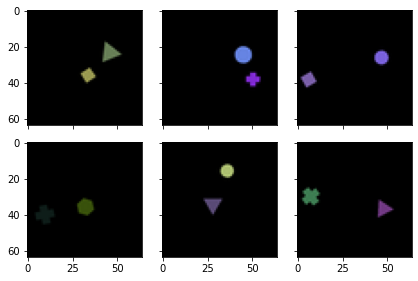

In [3]:
n_samples = 1000
n_slots = 2
sample_mode = "random"
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode)
plot_random_dataset_images(random_dataset)

Generating images (sampling: random): 100%|███████████████████████████████████████| 1000/1000 [00:08<00:00, 120.18it/s]


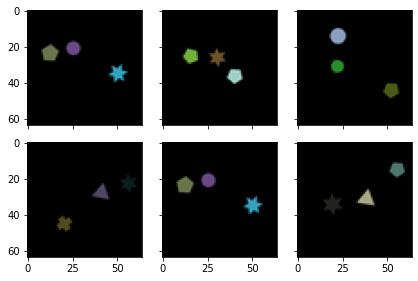

In [4]:
n_samples = 1000
n_slots = 3
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode)
plot_random_dataset_images(random_dataset)

## Diagonal Sampling

Delta is too big for 'no_overlap' mode, setting it to 0.125.


Generating images (sampling: diagonal): 100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 157.91it/s]


n_slots 2, no_overlap True


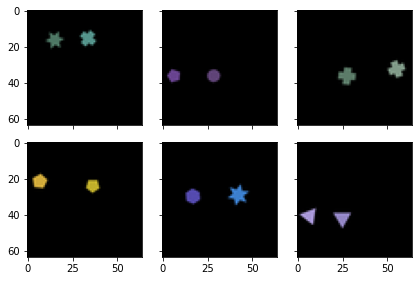

Generating images (sampling: diagonal): 100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 155.86it/s]


n_slots 2, no_overlap False


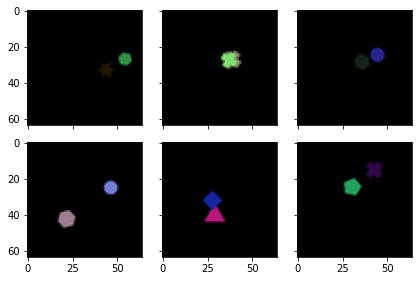

Delta is too big for 'no_overlap' mode, setting it to 0.1.


Generating images (sampling: diagonal): 100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 116.76it/s]


n_slots 3, no_overlap True


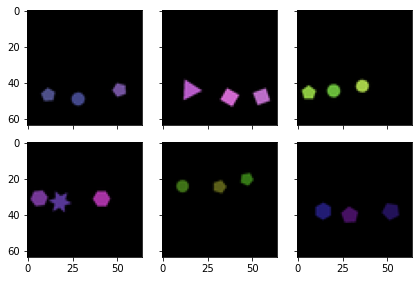

Generating images (sampling: diagonal): 100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 116.43it/s]


n_slots 3, no_overlap False


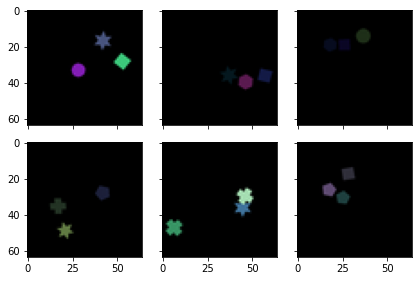

In [5]:
delta = 0.4
sample_mode = "diagonal"
for n_slots in [2, 3]:
    for no_overlap in [True, False]:
        diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, 
                                                 no_overlap=no_overlap,
                                                 delta=delta)
        print(f"n_slots {n_slots}, no_overlap {no_overlap}")
        plot_random_dataset_images(diagonal_dataset)


## Off-Diagonal Sampling

Generating images (sampling: off_diagonal): 100%|█████████████████████████████████| 1000/1000 [00:06<00:00, 152.64it/s]


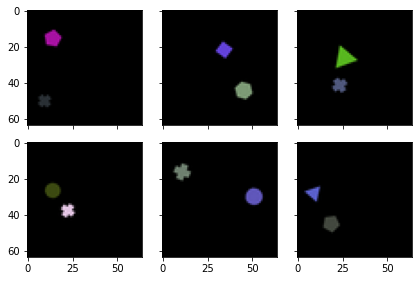

In [6]:
n_slots = 2
sample_mode = "off_diagonal"
delta = 0.2

off_diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, delta=delta)
plot_random_dataset_images(off_diagonal_dataset)

Generating images (sampling: off_diagonal): 100%|█████████████████████████████████| 1000/1000 [00:08<00:00, 116.12it/s]


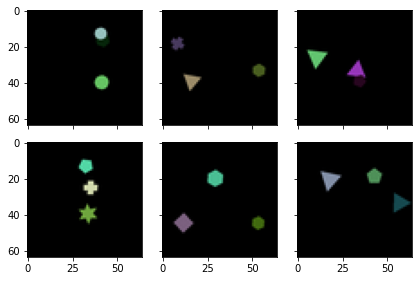

In [7]:
n_slots = 3
sample_mode = "off_diagonal"
delta = 0.1

off_diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, delta=delta)
plot_random_dataset_images(off_diagonal_dataset)